In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import matplotlib.pyplot as plt
from explainer_comparison.ExplainerFactory import ExplainerFactory
from explainer_comparison.explainer_utilities import run_and_collect_explanations
from explainer_comparison.consistency_measurement import consistency_measurement, visualize_consistency
from tqdm import tqdm



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?


Processing folds:   0%|          | 0/5 [00:00<?, ?it/s]

Processing folds: 100%|██████████| 5/5 [02:32<00:00, 30.42s/it]


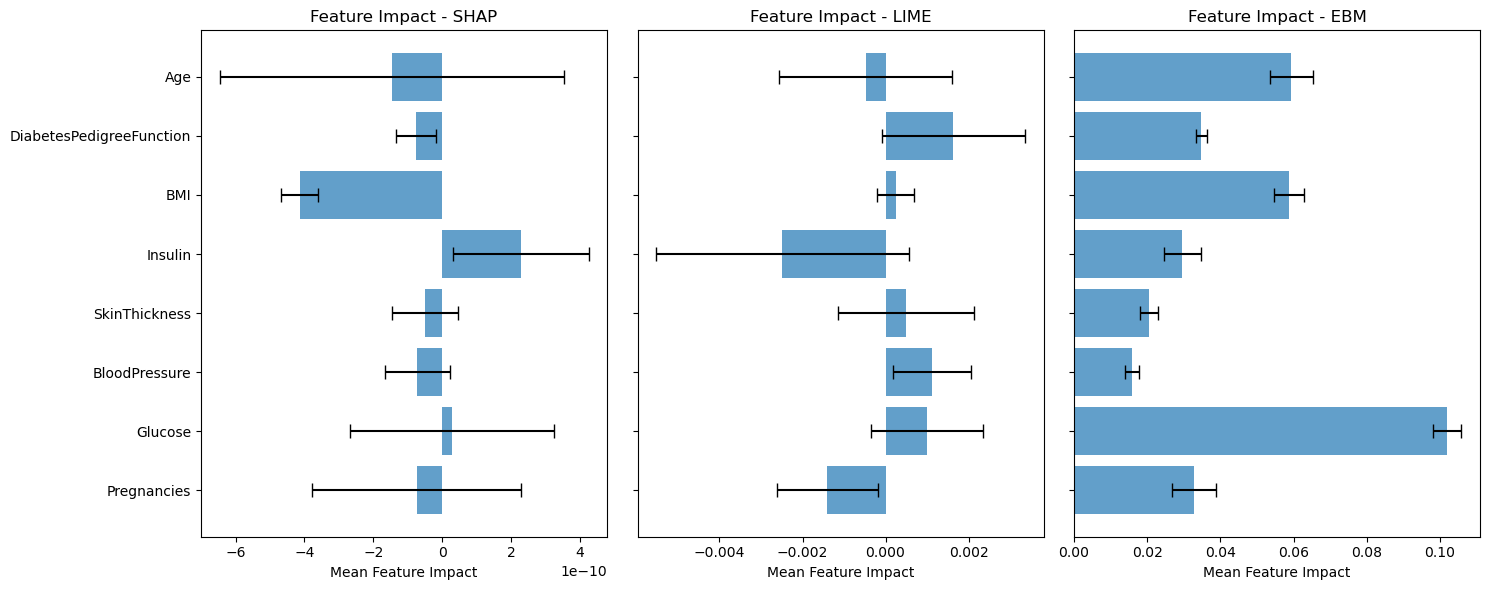

          mean_std    median_std
shap  1.995150e-10  1.460123e-10
lime  1.556746e-03  1.492404e-03
ebm   3.818758e-03  3.973209e-03


In [2]:
# read a dataset
df = pd.read_csv('data/diabetes/diabetes.csv')

# data
X = df.iloc[:, :-1]
y = df.Outcome

model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

summary, final_scores_df = consistency_measurement(X, y, model, n_splits=5, explainers=['shap', 'lime', 'ebm'], verbose=False)

In [3]:
final_scores_df

,mean_std,median_std
shap,1.995150e-10,1.460123e-10
lime,1.556746e-03,1.492404e-03
ebm,3.818758e-03,3.973209e-03


In [ ]:
def visualize_consistency(explainers, feature_names, summary):
    num_explainers = len(explainers)
    fig, axes = plt.subplots(1, num_explainers, figsize=(15, 6), sharey=True)

    # Visualization
    for ax, explainer in zip(axes, explainers):
        mean_impact, std_impact = summary[explainer]
        ax.barh(feature_names, mean_impact, xerr=std_impact, align='center', alpha=0.7, ecolor='black', capsize=5)
        ax.set_xlabel('Mean Feature Impact')
        ax.set_title(f'Feature Impact - {explainer.upper()}')

    plt.tight_layout()
    plt.show()

In [ ]:
def consistency_measurement(X, y, model, n_loops=3, n_splits=5, explainers=None, verbose=False):

    folds = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    available_explainers = ["shap", "lime", "ebm"] #, "mimic"]  # Easily extendable for additional explainers
    feature_names = X.columns

    chosen_explainers = explainers if explainers is not None else available_explainers
    loop_numbers = range(n_loops)
    loop_results = {f'loop {loop_number}': [] for loop_number in loop_numbers}
    
    for loop_num in loop_numbers:
        results = {explainer: [] for explainer in chosen_explainers}
        for train_index, test_index in tqdm(folds.split(X, y), total=n_splits, desc="Processing folds"):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)

            factory = ExplainerFactory(model, X_train, X_test, y_train, y_test)
            explanations = run_and_collect_explanations(factory, X_train, explainers=chosen_explainers, verbose=verbose)

            for explainer in chosen_explainers:
                explainer_values = explanations[explainer.upper() + " Value"]
                results[explainer].append(explainer_values)
        loop_results[f'loop {loop_num}'].append(results)


    # summary = {}
    # for explainer in explainers:
    #     results[explainer] = np.array(results[explainer])
    #     mean_impact = np.mean(results[explainer], axis=0)
    #     std_impact = np.std(results[explainer], axis=0)
    #     summary[explainer] = (mean_impact, std_impact)
        
    # Visualization
    # visualize_consistency(chosen_explainers, feature_names, summary)

    # final_scores = {explainer: {'mean_std': np.mean(summary[explainer][1]), 'median_std': np.median(summary[explainer][1])} for explainer in explainers}
    # final_scores_df = pd.DataFrame(final_scores).T
    
    # Display side by side final scores of all XAI methods
    # print(final_scores_df)

    # return summary, final_scores_df, results
    return loop_results



In [47]:

# read a dataset
df = pd.read_csv('data/diabetes/diabetes.csv')


# data
X = df.iloc[:, :-1]
y = df.Outcome

model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

#summary, final_scores_df, results = consistency_measurement(X, y, model, n_splits=5, explainers=['shap', 'lime', 'ebm'], verbose=False)
loop_results = consistency_measurement(X, y, model, n_loops=3, n_splits=5, explainers=['shap', 'lime', 'ebm'], verbose=True)

Processing folds:   0%|          | 0/5 [00:00<?, ?it/s]


 SHAP explanation created

 LIME explanation created


Processing folds:  20%|██        | 1/5 [00:28<01:54, 28.75s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  40%|████      | 2/5 [00:49<01:12, 24.20s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  60%|██████    | 3/5 [01:11<00:46, 23.10s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  80%|████████  | 4/5 [01:33<00:22, 22.66s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds: 100%|██████████| 5/5 [01:54<00:00, 22.90s/it]



 EBM explanation created


Processing folds:   0%|          | 0/5 [00:00<?, ?it/s]


 SHAP explanation created

 LIME explanation created


Processing folds:  20%|██        | 1/5 [00:21<01:25, 21.46s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  40%|████      | 2/5 [00:42<01:04, 21.34s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  60%|██████    | 3/5 [01:03<00:42, 21.21s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  80%|████████  | 4/5 [01:27<00:22, 22.06s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds: 100%|██████████| 5/5 [01:48<00:00, 21.68s/it]



 EBM explanation created


Processing folds:   0%|          | 0/5 [00:00<?, ?it/s]


 SHAP explanation created

 LIME explanation created


Processing folds:  20%|██        | 1/5 [00:21<01:26, 21.55s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  40%|████      | 2/5 [00:42<01:03, 21.10s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  60%|██████    | 3/5 [01:04<00:43, 21.72s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds:  80%|████████  | 4/5 [01:25<00:21, 21.33s/it]


 EBM explanation created

 SHAP explanation created

 LIME explanation created


Processing folds: 100%|██████████| 5/5 [01:43<00:00, 20.71s/it]


 EBM explanation created


In [41]:
loop_results

{'loop 0': [{'shap': [Pregnancies                 2.487942e-10
    Glucose                     2.572922e-10
    BloodPressure               5.447020e-11
    SkinThickness               1.752634e-10
    Insulin                     7.876793e-10
    BMI                        -4.543106e-10
    DiabetesPedigreeFunction   -3.460125e-10
    Age                         2.645114e-12
    Name: SHAP Value, dtype: float64,
    Pregnancies                -3.309272e-10
    Glucose                     6.311983e-11
    BloodPressure               4.887580e-12
    SkinThickness               8.645837e-11
    Insulin                     2.215870e-10
    BMI                        -7.318666e-10
    DiabetesPedigreeFunction    3.931878e-10
    Age                        -3.092699e-10
    Name: SHAP Value, dtype: float64],
   'lime': [Pregnancies                -0.002006
    Glucose                     0.000558
    BloodPressure              -0.002007
    SkinThickness               0.001267
    Insulin  

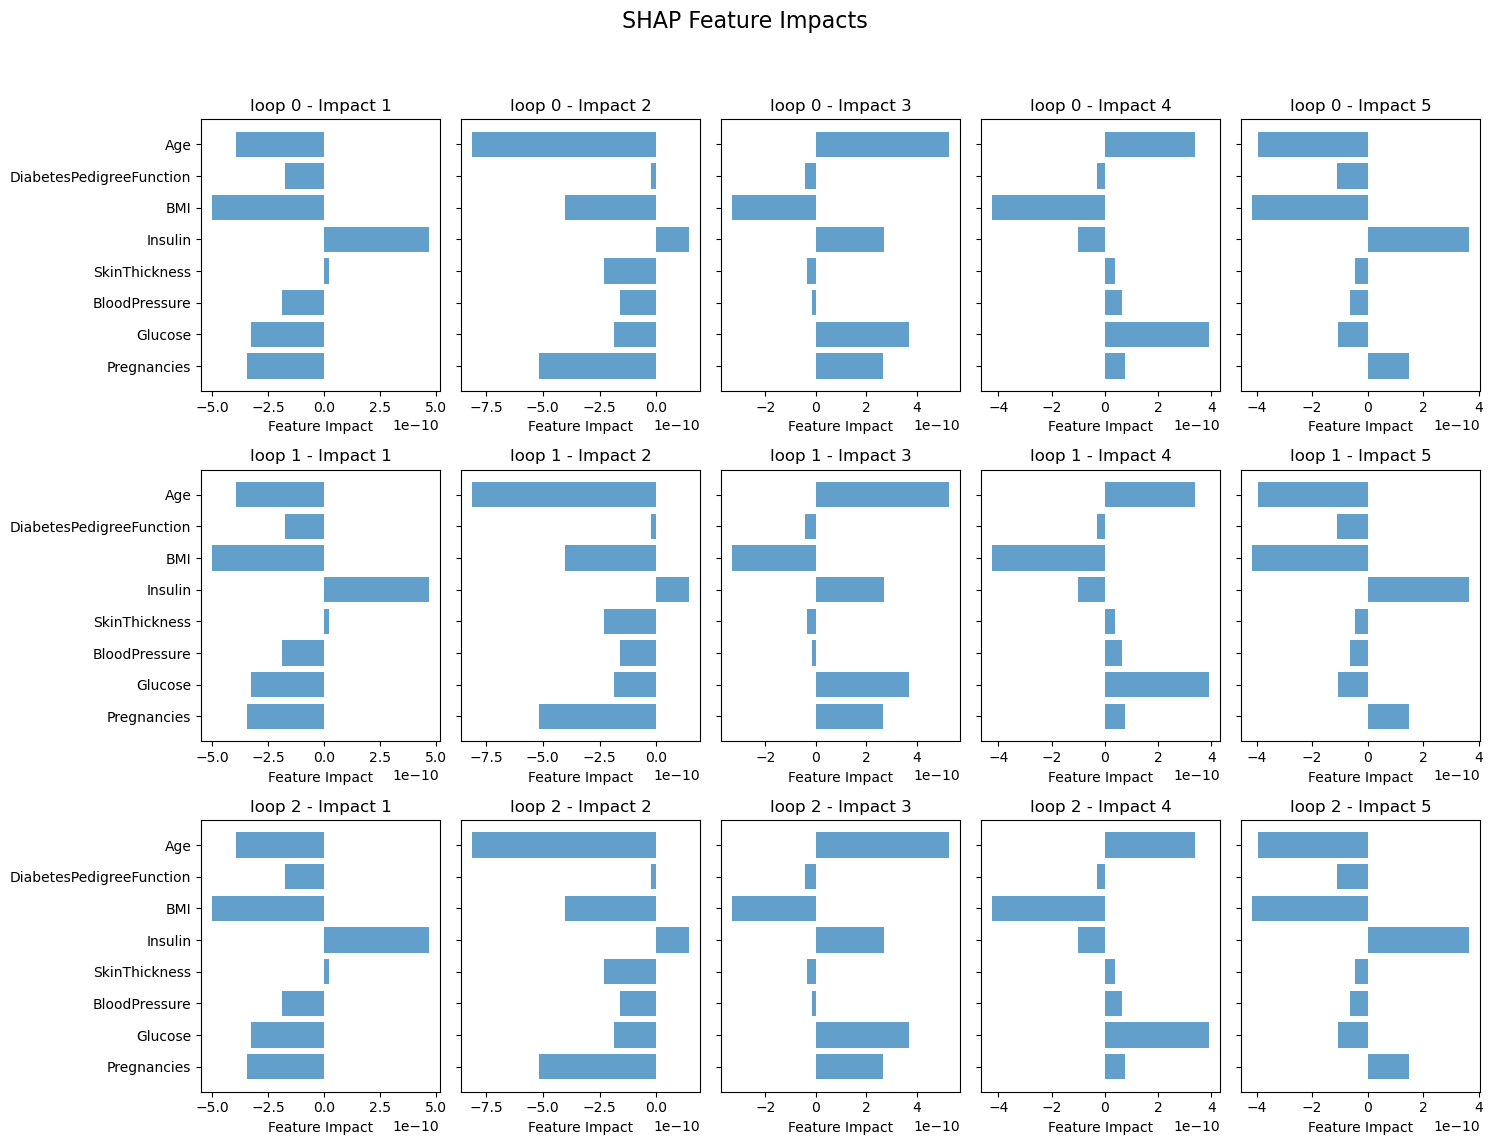

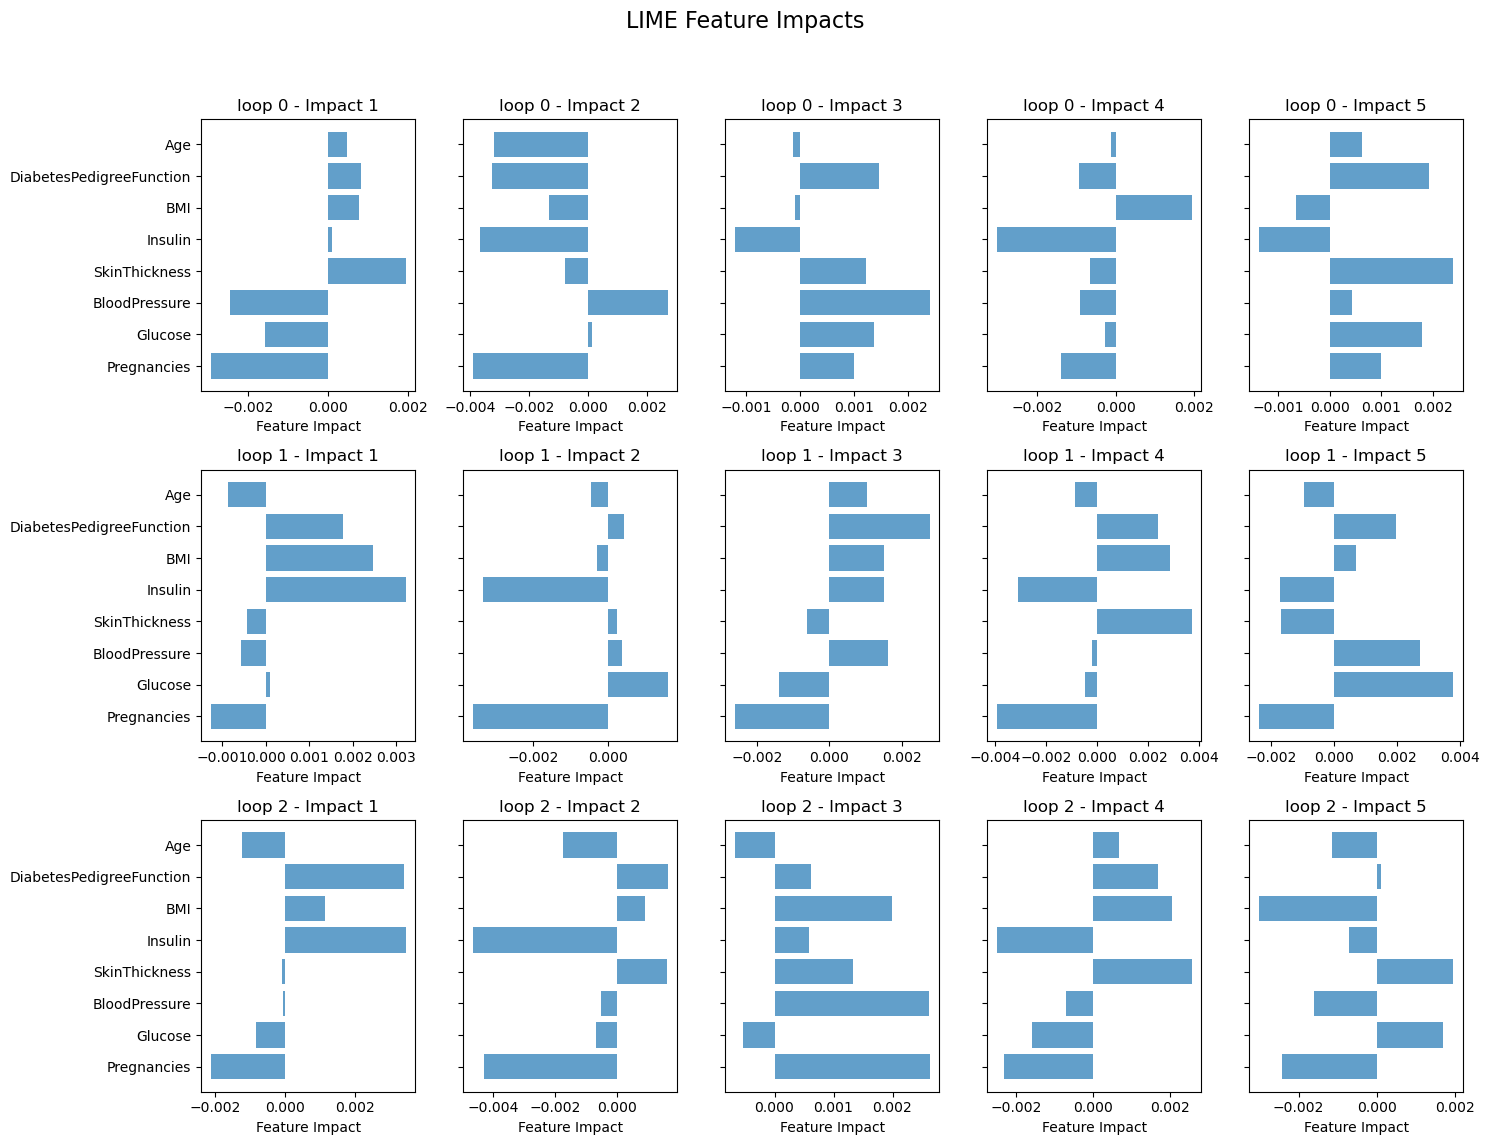

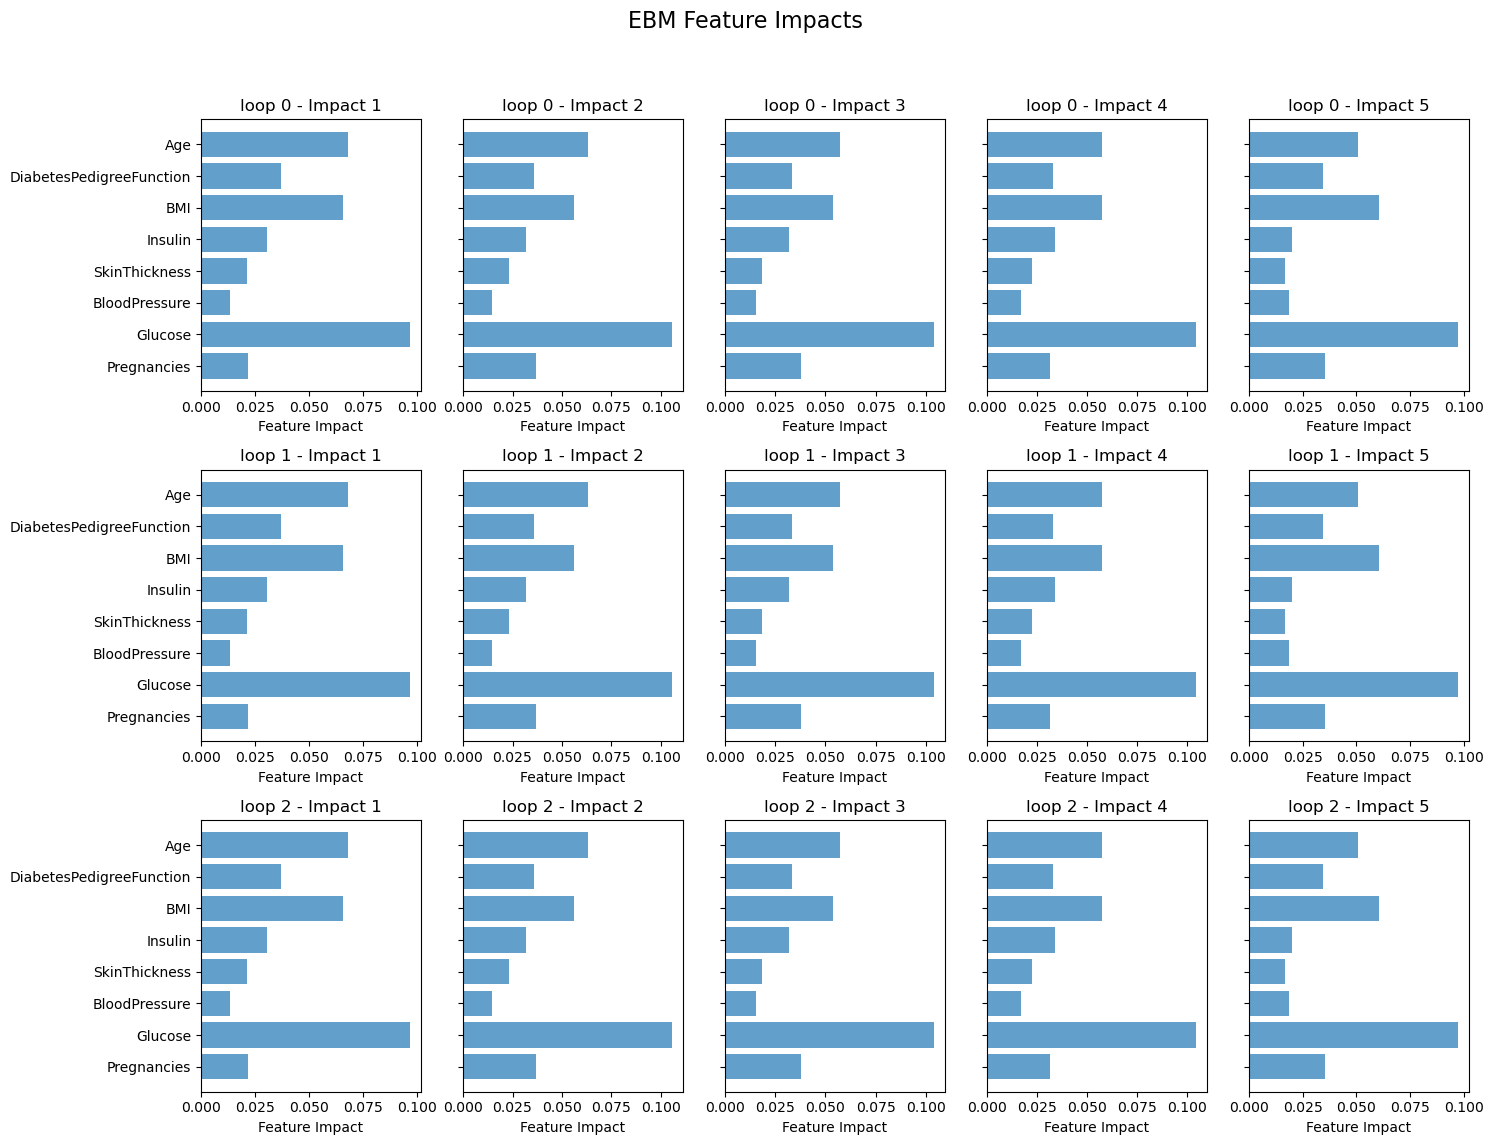

In [50]:
# Plotting
for explainer in ["shap", "lime", "ebm"]:
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12), sharey=True)
    fig.suptitle(f'{explainer.upper()} Feature Impacts', fontsize=16)
    
    for i, loop_key in enumerate(loop_results.keys()):
        loop_values = loop_results[loop_key][0]
        impacts = loop_values[explainer]
        
        for j, impact in enumerate(impacts):
            ax = axes[i][j]
            ax.barh(feature_names, impact, align='center', alpha=0.7, capsize=5)
            ax.set_xlabel('Feature Impact')
            ax.set_title(f'{loop_key} - Impact {j+1}')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()